Desafio realizado por Cristobal Novoa

# Desafío - Random Forest

● Para realizar este desafío debes haber estudiado previamente todo el material
disponibilizado correspondiente a la unidad.

● Una vez terminado el desafío, comprime la carpeta que contiene el desarrollo de los
requerimientos solicitados y sube el .zip en el LMS.

● Desarrollo desafío:

○ El desafío se debe desarrollar de manera Individual.

○ Para la realización del desafío necesitarás apoyarte del archivo Apoyo Desafío -
Random Forest

# Requerimientos

● Para esta sesión trabajaremos con una base de datos sobre los precios de inmuebles en
la ciudad de Ames, Iowa. La base se compone de 2930 registros y contiene un gran
número de atributos.

● Nuestro objetivo es generar un modelo que prediga de forma adecuada los precios de
inmuebles, medidos con la variable Sale_Price.

● A diferencia de otras sesiones donde implementamos el preprocesamiento a mano,
ahora haremos uso de los archivos serializados en la sesión pasada

# Ejercicio 1: Preparación del ambiente de trabajo

● Importe las librerías clásicas a utilizar.

● Para este ejercicio Random Forest de Regresión

● De manera adicional importe las funciones y clases necesarias para generar un
desempeño de métricas en problemas de regresión.

● Elimine la columna 'Unnamed: 0' cuando cargue los datos.

In [2]:
%config IPCompleter.greedy = True

In [3]:
#Importacion de librerias
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
plt.rcParams['figure.figsize'] = (10, 6)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, median_absolute_error,r2_score

In [4]:
#Se carga csv
df = pd.read_csv('ames_housing.csv').drop(['Unnamed: 0'], axis=1)
df.shape

(2930, 81)

In [5]:
df.head()

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,None,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.619756,42.053014
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Fence,None,0,4,2010,WD,Normal,244000,-93.617320,42.051245
4,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,-93.638933,42.060899


# Ejercicio 2: Importación de archivos serializados

● Importe su modelo entrenado y sus conjuntos de entrenamiento y validación
serializados la sesión pasada y evalúe el desempeño del modelo de su compañero con
el suyo ¿Cuál es mejor? Si no puede ejecutar el modelo, comente cuáles pueden ser los
causantes.

● No es necesario que realice diagnósticos gráficos sobre el modelo, sólo reporte sus
métricas.

● Para importar un archivo serializado, puede ocupar la siguiente línea de código:

`import pickle`
`read_model = pickle.load(open("ignacio-soto-act07.sav","rb"))`

In [6]:
import pickle

In [7]:
read_model = pickle.load(open("cn_dec_tree_best.sav","rb"))
read_Xtrain = pickle.load(open("cn_X_train.sav","rb"))
read_Xtest = pickle.load(open("cn_X_test.sav","rb"))
read_ytrain = pickle.load(open("cn_y_train.sav","rb"))
read_ytest = pickle.load(open("cn_y_test.sav","rb"))

In [8]:
print("Test MSE:", mean_squared_error(read_ytest, read_model.predict(read_Xtest)).round(5))
print("Test MAE:", median_absolute_error(read_ytest, read_model.predict(read_Xtest)).round(5))
print("Test R2:", r2_score(read_ytest, read_model.predict(read_Xtest)).round(5))

Test MSE: 1423793003.072
Test MAE: 16126.47059
Test R2: 0.77749


El desempeño del modelo de mi compañero es mejor, esto puede deberse a una diferencia en la seleccion de hiperparametros y a la diferencia del muestreo aleatorio por las semillas seudoaleatorias. 

# Ejercicio 3: Evaluación Random Forest

● En base a los conjuntos de entrenamiento serializados, genere un modelo utilizando
sklearn.ensemble.RandomForest sin modificar hiper parámetros, sólo declarando la
semilla pseudoaleatoria.

● Reporte su desempeño y compárelo con su modelo de la sesión pasada, así como con
el de su compañero.

In [9]:
regr = RandomForestRegressor(random_state=4982)

In [10]:
regr.fit(read_Xtrain, read_ytrain)

RandomForestRegressor(random_state=4982)

In [11]:
print("Test MSE:", mean_squared_error(read_ytest, regr.predict(read_Xtest)).round(5))
print("Test MAE:", median_absolute_error(read_ytest, regr.predict(read_Xtest)).round(5))
print("Test R2:", r2_score(read_ytest, regr.predict(read_Xtest)).round(5))

Test MSE: 878752533.43348
Test MAE: 12418.99
Test R2: 0.86267


Los resultados del modelo de Regresion con Random Forest son sustancialmente superiores a los del modelo de Regresion con arboles de decisión. El modelo de mi compañero tambien mejoro su desempeño

# Ejercicio 4: Reporte las métricas de desempeño

● Para afinar el comportamiento de nuestro modelo, evalúe su desempeño los siguientes
hiper parámetros:

○ max_features: None, log2, sqrt.

○ n_estimators: Evaluar entre 20 y 1000 en pasos de 50.

● Guarde la tasa de error en la exactitud medida con OOB.

● Grafique el comportamiento.

In [12]:
# generamos una serie de listas para guardar los valores
tmp_oob_none, tmp_oob_sqrt,tmp_oob_log2 = [], [], []
tmp_test_acc_none, tmp_test_acc_sqrt, tmp_test_acc_log = [], [], []
n_estimators = range(20, 1000, 50)
# para cada rango de modelos estimados
for i in n_estimators:
# Implementamos una variante con todos los atributos
    voting_rf_none = RandomForestRegressor(n_estimators= i,max_features=None, oob_score=True, random_state=4982).fit(read_Xtrain, read_ytrain)
# Implementamos una variante donde los atributos se escogen con sqrt
    voting_rf_sqrt = RandomForestRegressor(n_estimators= i,max_features="sqrt",warm_start=True,oob_score=True,random_state=4982).fit(read_Xtrain, read_ytrain)
# Implementamos una variante donde los atributos se escogen con log
    voting_rf_log = RandomForestRegressor(n_estimators= i,max_features="log2",warm_start=True,oob_score=True,random_state=4982).fit(read_Xtrain, read_ytrain)

# Estimamos el error en OOB
    tmp_oob_none.append(1 - voting_rf_none.oob_score_)
    tmp_oob_sqrt.append(1 - voting_rf_sqrt.oob_score_)
    tmp_oob_log2.append(1 - voting_rf_log.oob_score_)

C:\Users\cris\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\cris\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\cris\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


<Figure size 864x288 with 0 Axes>

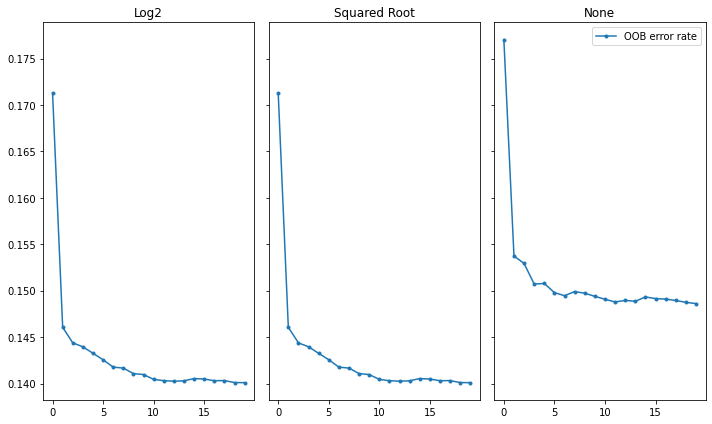

In [13]:
#Se grafica el comportamiento de los errores OOB con los tres hiperparametros y n_estimators de acuerdo a lo indicado
plt.figure(figsize=(12, 4));
fig, axs = plt.subplots(1, 3, sharex=True, sharey=True);
axs[0].plot(tmp_oob_log2, '.-', label='OOB error rate');
axs[0].set_title('Log2');
axs[1].plot(tmp_oob_sqrt,'.-', label='OOB error rate');
axs[1].set_title('Squared Root');
axs[2].plot(tmp_oob_none, '.-', label='OOB error rate');
axs[2].set_title('None');
plt.tight_layout();
plt.legend()

Los hiperparametros Log2 y sqrt obtienen una menor tasa de error en la exactitud medida en OOB. Se puede observar tanto en la grafica de Log2 y Squared Root, que hacia el final de la curva se podría obtener la mejor combinación de hiperparametros considerando la lógica de que a mayor numero de árboles, mejor desempeño se obtendra(aunque esto pueda caer en overfitting).

Para corroborar lo deducido de las graficas generare un Gridsearch.

# Ejercicio 5: Refactoriza el modelo

● En base a la mejor combinación de hiper parámetros, reentrene el modelo y comente su
desempeño.

In [14]:
g_cv = GridSearchCV(RandomForestRegressor(random_state=4982),
              param_grid={'n_estimators' : range(20, 1000, 50),
                          'max_features':[None,'sqrt', 'log2']},
                          cv=5)

Wall time: 0 ns


In [15]:
%time
g_cv.fit(read_Xtrain, read_ytrain)

Wall time: 0 ns


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=4982),
             param_grid={'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': range(20, 1000, 50)})

In [16]:
g_cv.best_params_

{'max_features': 'sqrt', 'n_estimators': 970}

Se corrobora lo deducido en las graficas. La mejor combinacion de hiperparametros se alcanza con max_features: sqrt y n_stimators: 970

In [14]:
model_forest = RandomForestRegressor(random_state=4982, max_features= 'sqrt', n_estimators =970).fit(read_Xtrain, read_ytrain)

In [15]:
print("Test MSE:", mean_squared_error(read_ytest, model_forest.predict(read_Xtest)).round(5))
print("Test MAE:", median_absolute_error(read_ytest, model_forest.predict(read_Xtest)).round(5))
print("Test R2:", r2_score(read_ytest, model_forest.predict(read_Xtest)).round(5))

Test MSE: 899353983.18232
Test MAE: 12198.03814
Test R2: 0.85945


# Se obtiene un desempeño similar con la mejor combinacion de hiperparametros. En tanto, que su pequeña reduccion en el desempeño pueda ser compensada por una significativa reduccion del MAE. En cualquier caso, el desempeño del modelo es bastante aceptable en terminos generales.  

# Carga datos Alejandro Chau

In [19]:
import pickle

In [20]:
pickle.dump(model_forest, open('model_forest.sav','wb'))

In [21]:
read_model = pickle.load(open("alejandro-chau-arbol-regresion.sav","rb"))
read_Xtrain = pickle.load(open("alejandro-chau-arbol-regresion-xtest.sav","rb"))
read_Xtest = pickle.load(open("alejandro-chau-arbol-regresion-xtrain.sav","rb"))
read_ytrain = pickle.load(open("alejandro-chau-arbol-regresion-ytest.sav","rb"))
read_ytest = pickle.load(open("alejandro-chau-arbol-regresion-ytrain.sav","rb"))

C:\Users\cris\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.24.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [28]:
print("Test MSE:", mean_squared_error(read_ytest, read_model.predict(read_Xtest)).round(5))
print("Test MAE:", median_absolute_error(read_ytest, read_model.predict(read_Xtest)).round(5))
print("Test R2:", r2_score(read_ytest, read_model.predict(read_Xtest)).round(5))

Test MSE: 1059486859.48378
Test MAE: 15465.24731
Test R2: 0.84022
